# fitting models for pv with solar info -1

**************************************************
Fitting model for: pv
**************************************************


[I 2023-07-24 17:02:44,093] A new study created in memory with name: no-name-2b79b93b-9fc9-41e0-8ba9-f698ab296d84
[I 2023-07-24 17:02:47,027] Trial 0 finished with value: -115.62261321239184 and parameters: {'max_depth': 3, 'learning_rate': 0.34362425657060686, 'n_estimators': 37, 'min_child_weight': 3, 'gamma': 0.15371268920612496, 'subsample': 0.030572067157707772, 'colsample_bytree': 0.03982799925037879, 'reg_alpha': 0.4180947871141855, 'reg_lambda': 4.821595504725714e-06}. Best is trial 0 with value: -115.62261321239184.
[I 2023-07-24 17:02:56,610] Trial 1 finished with value: -326931188.0727946 and parameters: {'max_depth': 7, 'learning_rate': 0.9926642016846339, 'n_estimators': 107, 'min_child_weight': 2, 'gamma': 0.06758360157509351, 'subsample': 0.013343620665201197, 'colsample_bytree': 0.14827205478988334, 'reg_alpha': 0.0044532366719747165, 'reg_lambda': 1.1103019380899668e-06}. Best is trial 0 with value: -115.62261321239184.
[I 2023-07-24 17:02:59,928] Trial 2 finished with

Number of finished trials: 30
Best trial:
  Value: -49.71664486503316
  Params: 
    max_depth: 10
    learning_rate: 0.01696277439195988
    n_estimators: 320
    min_child_weight: 2
    gamma: 0.013356417900028054
    subsample: 0.5056782243061119
    colsample_bytree: 0.5206835165600974
    reg_alpha: 5.86252645637545e-06
    reg_lambda: 0.3531735610725217
mean_squared_error:28233.26
mean_absolute_error:80.32
percentage_error:inf%
feature_importance: [('dayofmonth', 9530.0), ('RealPower_-2d_1h', 9164.0), ('RealPower_-1d_1h', 8810.0), ('solar_zenith', 8312.0), ('RealPower_-3d_1h', 8303.0), ('solar_azimuth', 8283.0), ('temp_-1h', 7806.0), ('RealPower_-1d_0h', 7775.0), ('RealPower_-2d_-1h', 7195.0), ('RealPower_-1d_-1h', 7095.0), ('RealPower_-2d_0h', 7076.0), ('RealPower_-3d_0h', 7063.0), ('RealPower_-3d_-1h', 7045.0), ('temp_-3h', 5838.0), ('temp_-2h', 5751.0), ('month', 5395.0), ('clouds_all_-1h', 4515.0), ('temp_min_-1h', 4443.0), ('temp_min_-2h', 3804.0), ('temp_max_-1h', 3648.0), 

d:\Codes\GIthub_repo\Energy_grid\scripts\XGboost_Optuna\XGBoost_helper.py:585: RuntimeWarning:

divide by zero encountered in divide



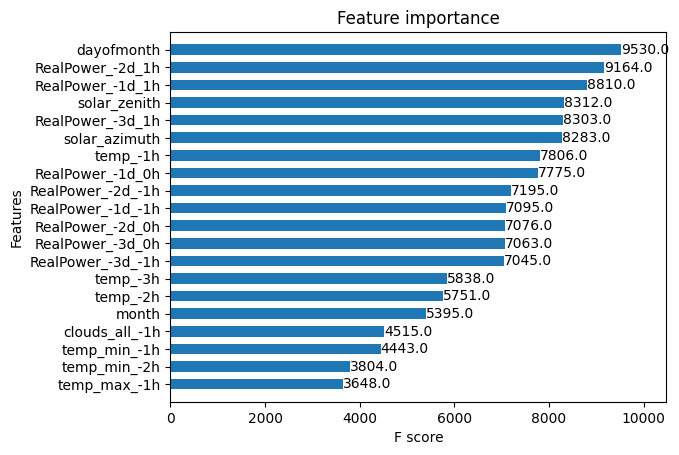

In [51]:
from XGBoost_helper import Data_encoder,Optuna_core,XGBoost_Optuna,Simple_forecast, intersection_sum

weather_setting_={
    'weather_fn':r'L:/Coding_project/Energy_grid_new/data/UCSD_raw_data/Weather_SanDiego.csv',
    'keys':['temp','temp_min','temp_max'],
    'shift':[6,6,6] 
} 
data_setting_={
    'load_from_existing_file':True,
    'data_fn':'sum_real',
    'src_path':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/0829_target_encoding_7d_5h/',
    'save_prefix':'0829_target_encoding_7d_5h',
    'save_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'days_ahead':[1,2,3,4,5,6,7],
    'hours_ahead':[1,0,-1],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'load_type':'PV',
    'split_date':'01-Jan-2019'
}


model_setting_={
    'n_trials':30,
    'metrics':'neg_mean_absolute_error',
    'stop_threshold':-10,
    'model_folder':r'D:/Codes/GIthub_repo/Energy_grid/scripts/XGboost_Optuna/model/',
    'save_prefix':'0829_pv_1',
    'visualization_types':['optimization_history','contour','slice'],
    'params':{
        'max_depth':[1,10],
        'learning_rate':[0.01,1],
        'min_child_weight':[1,10],
        'n_estimators':[5,500],
        'gamma':[0.01,1],
        'subsample':[0.01,1],
        'colsample_bytree':[0.01,1],
        'reg_alpha':[1e-8,1],
        'reg_lambda':[1e-8,1],
    }
}


print('*'*50)
print('Fitting model for: pv')
print('*'*50)
case=XGBoost_Optuna(data_setting_=data_setting_,
                    weather_setting_=weather_setting_,
                    model_setting_=model_setting_,
                    )
case.optuna_optimizer()
case.optuna_visualization()
case.refit_best_trail()
case.predict_n_evaluate()
case.save_model()

# fitting models for pv with solar info -2